In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_url = 'https://raw.githubusercontent.com/HarshithRR29/Assignment-2/main/data/diabetes.csv'
df = pd.read_csv(data_url)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Part (a): Mean and Highest Glucose Values

In [3]:
# Set seed for reproducibility
np.random.seed(42)

In [4]:
# Take a random sample of 25 observations
sample = df.sample(n=25)

In [5]:
# Calculate mean and highest Glucose values for the sample
mean_glucose_sample = sample['Glucose'].mean()
max_glucose_sample = sample['Glucose'].max()

print(f"Mean Glucose (Sample): {mean_glucose_sample}")
print(f"Highest Glucose (Sample): {max_glucose_sample}")

Mean Glucose (Sample): 116.64
Highest Glucose (Sample): 183


In [6]:
# Calculate mean and highest Glucose values for the population
mean_glucose_population = df['Glucose'].mean()
max_glucose_population = df['Glucose'].max()

print(f"Mean Glucose (Population): {mean_glucose_population}")
print(f"Highest Glucose (Population): {max_glucose_population}")

Mean Glucose (Population): 120.89453125
Highest Glucose (Population): 199


<Figure size 1000x500 with 0 Axes>

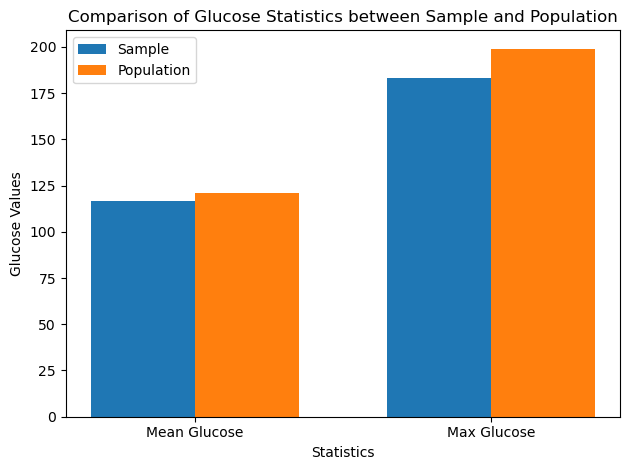

(116.64, 183, 120.89453125, 199)

In [7]:
# Create a comparison chart for mean Glucose values
plt.figure(figsize=(10, 5))
labels = ['Mean Glucose', 'Max Glucose']
sample_values = [mean_glucose_sample, max_glucose_sample]
population_values = [mean_glucose_population, max_glucose_population]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sample_values, width, label='Sample')
rects2 = ax.bar(x + width/2, population_values, width, label='Population')

ax.set_xlabel('Statistics')
ax.set_ylabel('Glucose Values')
ax.set_title('Comparison of Glucose Statistics between Sample and Population')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

mean_glucose_sample, max_glucose_sample, mean_glucose_population, max_glucose_population

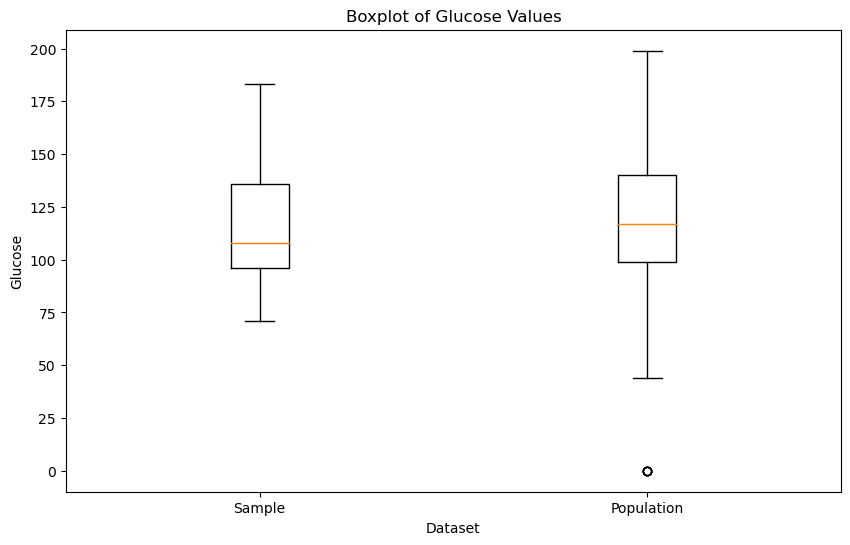

In [8]:
plt.figure(figsize=(10, 6))
plt.boxplot([sample['Glucose'], df['Glucose']], labels=['Sample', 'Population'])
plt.xlabel('Dataset')
plt.ylabel('Glucose')
plt.title('Boxplot of Glucose Values')
plt.show()

### Part (b): 98th Percentile of BMI

In [9]:
# Calculate the 98th percentile of BMI for the sample
percentile_98_bmi_sample = np.percentile(sample['BMI'], 98)

print(f"98th Percentile of BMI (Sample): {percentile_98_bmi_sample}")

98th Percentile of BMI (Sample): 40.248


In [10]:
# Calculate the 98th percentile of BMI for the population
percentile_98_bmi_population = np.percentile(df['BMI'], 98)

print(f"98th Percentile of BMI (Population): {percentile_98_bmi_population}")

98th Percentile of BMI (Population): 47.52599999999996


<Figure size 1000x500 with 0 Axes>

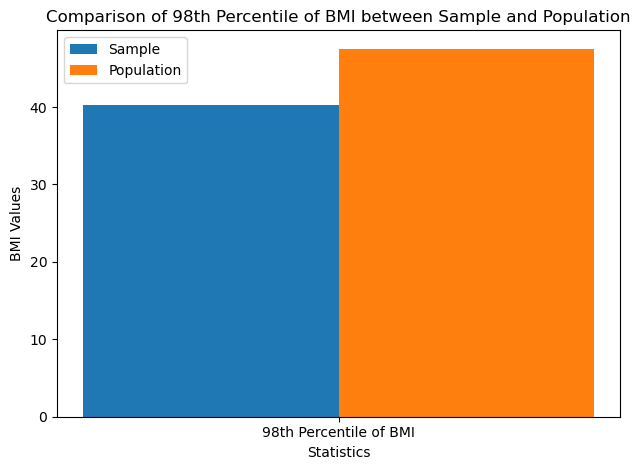

(40.248, 47.52599999999996)

In [11]:
# Create a comparison chart for the 98th percentile of BMI
plt.figure(figsize=(10, 5))
labels = ['98th Percentile of BMI']
sample_values = [percentile_98_bmi_sample]
population_values = [percentile_98_bmi_population]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sample_values, width, label='Sample')
rects2 = ax.bar(x + width/2, population_values, width, label='Population')

ax.set_xlabel('Statistics')
ax.set_ylabel('BMI Values')
ax.set_title('Comparison of 98th Percentile of BMI between Sample and Population')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

percentile_98_bmi_sample, percentile_98_bmi_population

### Part (c): Bootstrap Sampling for BloodPressure

In [12]:
# Bootstrap sampling
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

n_iterations = 500
sample_size = 150

In [13]:
for _ in range(n_iterations):
    bootstrap_sample = df.sample(n=sample_size, replace=True)
    mean_bp = bootstrap_sample['BloodPressure'].mean()
    std_bp = bootstrap_sample['BloodPressure'].std()
    percentile_98_bp = np.percentile(bootstrap_sample['BloodPressure'], 98)
    
    bootstrap_means.append(mean_bp)
    bootstrap_stds.append(std_bp)
    bootstrap_percentiles.append(percentile_98_bp)

In [14]:
# Calculate average statistics from bootstrap samples
average_mean_bp = np.mean(bootstrap_means)
average_std_bp = np.mean(bootstrap_stds)
average_percentile_98_bp = np.mean(bootstrap_percentiles)

print(f"Average Mean BloodPressure (Bootstrap): {average_mean_bp}")
print(f"Average Std BloodPressure (Bootstrap): {average_std_bp}")
print(f"Average 98th Percentile BloodPressure (Bootstrap): {average_percentile_98_bp}")

Average Mean BloodPressure (Bootstrap): 69.17696
Average Std BloodPressure (Bootstrap): 19.08274018350705
Average 98th Percentile BloodPressure (Bootstrap): 97.92404000000003


In [15]:
# Calculate population statistics for BloodPressure
mean_bp_population = df['BloodPressure'].mean()
std_bp_population = df['BloodPressure'].std()
percentile_98_bp_population = np.percentile(df['BloodPressure'], 98)

print(f"Mean BloodPressure (Population): {mean_bp_population}")
print(f"Std BloodPressure (Population): {std_bp_population}")
print(f"98th Percentile BloodPressure (Population): {percentile_98_bp_population}")

Mean BloodPressure (Population): 69.10546875
Std BloodPressure (Population): 19.355807170644777
98th Percentile BloodPressure (Population): 99.31999999999994


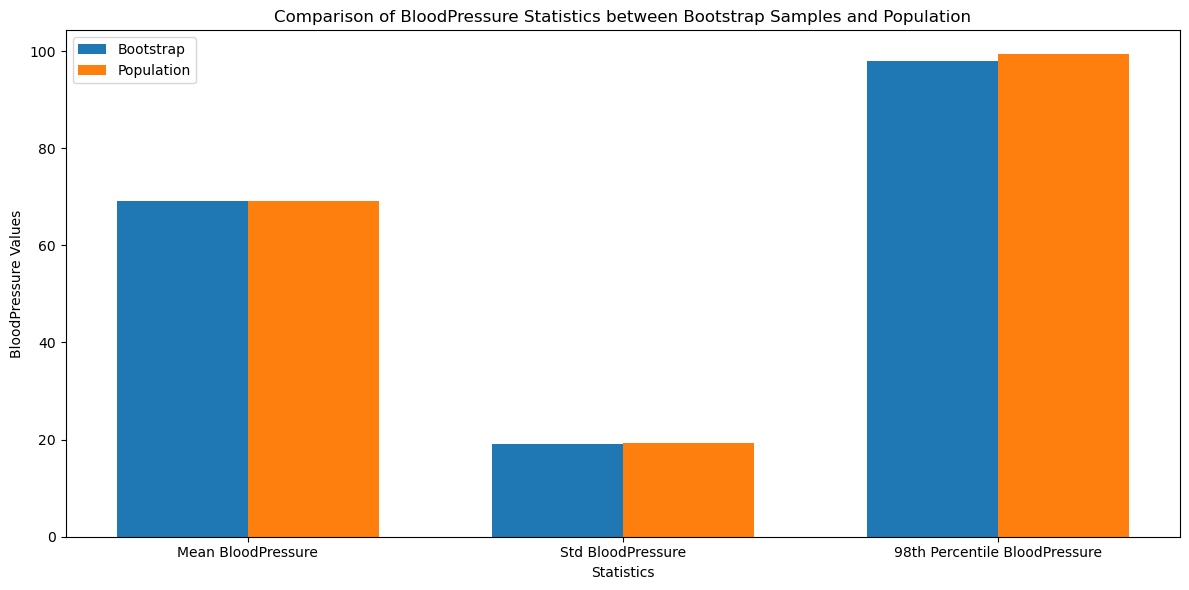

(69.17696,
 19.08274018350705,
 97.92404000000003,
 69.10546875,
 19.355807170644777,
 99.31999999999994)

In [16]:
# Create comparison charts
labels = ['Mean BloodPressure', 'Std BloodPressure', '98th Percentile BloodPressure']
bootstrap_values = [average_mean_bp, average_std_bp, average_percentile_98_bp]
population_values = [mean_bp_population, std_bp_population, percentile_98_bp_population]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, bootstrap_values, width, label='Bootstrap')
rects2 = ax.bar(x + width/2, population_values, width, label='Population')

ax.set_xlabel('Statistics')
ax.set_ylabel('BloodPressure Values')
ax.set_title('Comparison of BloodPressure Statistics between Bootstrap Samples and Population')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

average_mean_bp, average_std_bp, average_percentile_98_bp, mean_bp_population, std_bp_population, percentile_98_bp_population